In [1]:
import numpy as np
import pandas as pd
from fastai.imports import *

from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [2]:
sz=320
bs = 32
path='data/hackerearth-myntra'
arch=dn121

In [3]:
trn_tfms,val_tfms = tfms_from_model(arch,sz,crop_type=CropType.NO)

In [4]:
data = ImageClassifierData.from_csv(path='data/hackerearth-myntra/',folder='train',csv_fname='myntra-last.csv',tfms=(trn_tfms,val_tfms),bs=bs)

In [5]:
learn = ConvLearner.pretrained(arch,data,precompute=True,ps=0.2)

In [6]:
learn.fit(0.005,5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                     
    0      1.095144   0.997448   0.703709  
    1      0.98737    0.952864   0.712252                      
    2      0.977017   0.935158   0.722182                      
    3      0.897929   0.912973   0.729556                       
    4      0.840974   0.907174   0.730578                      



[0.90717381, 0.73057827102803741]

In [7]:
learn.fit(0.005,2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                      
    0      0.83221    0.898743   0.734886  
    1      0.818444   0.889852   0.739048                       



[0.88985211, 0.73904789719626163]

In [8]:
learn.fit(0.005,2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                      
    0      0.769262   0.888073   0.741165  
    1      0.762321   0.891767   0.740143                      



[0.8917672, 0.74014310747663548]

In [9]:
learn.fit(0.005,4)

HBox(children=(IntProgress(value=0, description='Epoch', max=4), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                      
    0      0.705853   0.888349   0.742626  
    1      0.725415   0.894889   0.739705                      
    2      0.675483   0.90057    0.743429                      
    3      0.595305   0.901325   0.746714                      



[0.90132469, 0.74671436915887845]

In [10]:
learn.fit(0.001,5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                      
    0      0.55585    0.879423   0.749343  
    1      0.510651   0.881272   0.750657                       
    2      0.514444   0.882892   0.750657                       
    3      0.491615   0.891662   0.751971                       
    4      0.468142   0.896495   0.753067                       



[0.89649498, 0.75306658878504673]

In [11]:
learn.fit(0.0005,4)

HBox(children=(IntProgress(value=0, description='Epoch', max=4), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                      
    0      0.437008   0.888402   0.752848  
    1      0.464154   0.885229   0.752409                       
    2      0.436172   0.895608   0.75387                       
    3      0.44411    0.898931   0.753286                      



[0.89893109, 0.75328563084112155]

In [12]:
learn.fit(0.0001,4)

HBox(children=(IntProgress(value=0, description='Epoch', max=4), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                      
    0      0.452398   0.897873   0.751606  
    1      0.441896   0.896694   0.752921                      
    2      0.454039   0.894324   0.753943                       
    3      0.433958   0.895986   0.752994                      



[0.89598614, 0.75299357476635509]

In [13]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix_mine(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.figure(figsize=(12,12))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Confusion matrix, without normalization      
[[ 109    6    3    0    3   12   19   40   65    0   12    3   29    0    5   24    4    0   20    6    6
     1   87    0]
 [   2   58    0    0    0    1    0    1   13    0    6    2    9    0    0    0    1    0    0    0    0
     0   31    0]
 [   4    0   20    0    1    0    2    1    8    0    0    0    0    0    0    3    0    0    1    0    0
     0    5    0]
 [   1    0    0   29    1    0    0    5    0    0    0    0    0    0    0    8    0    0    2    0    0
     0    0    0]
 [   0    0    0    2  313    0    1    1    4    0    1    0    0    0    0  139    0    0   33    1    0
     1   17    0]
 [  15    2    0    0    0  106   13   30   30    0    9    1    1    0    0   17    3    0    2    1    0
     0   41    1]
 [  10    1    1    0    1   13  192   10   22    0    2    0    6    0    0   16    0    0    3    2    1
     0   27    0]
 [  22    0    1    0    7    9   12  226   12    0    3    1    2    3    0   

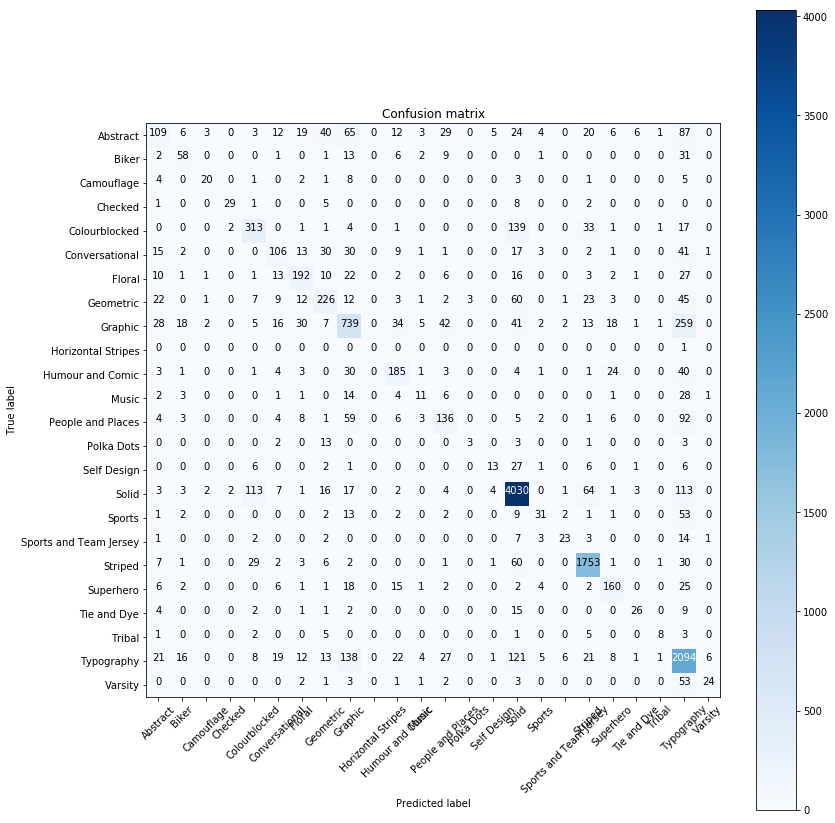

In [14]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)
accuracy_np(probs, y)
y[10]=9
predictions = np.argmax(probs,axis=1)
cm = confusion_matrix(y, predictions)
plot_confusion_matrix_mine(cm,data.classes,normalize=False)

Normalized confusion matrix
[[ 0.24009  0.01322  0.00661  0.       0.00661  0.02643  0.04185  0.08811  0.14317  0.       0.02643  0.00661
   0.06388  0.       0.01101  0.05286  0.00881  0.       0.04405  0.01322  0.01322  0.0022   0.19163  0.     ]
 [ 0.01613  0.46774  0.       0.       0.       0.00806  0.       0.00806  0.10484  0.       0.04839  0.01613
   0.07258  0.       0.       0.       0.00806  0.       0.       0.       0.       0.       0.25     0.     ]
 [ 0.08889  0.       0.44444  0.       0.02222  0.       0.04444  0.02222  0.17778  0.       0.       0.       0.
   0.       0.       0.06667  0.       0.       0.02222  0.       0.       0.       0.11111  0.     ]
 [ 0.02174  0.       0.       0.63043  0.02174  0.       0.       0.1087   0.       0.       0.       0.       0.
   0.       0.       0.17391  0.       0.       0.04348  0.       0.       0.       0.       0.     ]
 [ 0.       0.       0.       0.0039   0.61014  0.       0.00195  0.00195  0.0078   0.       0.001

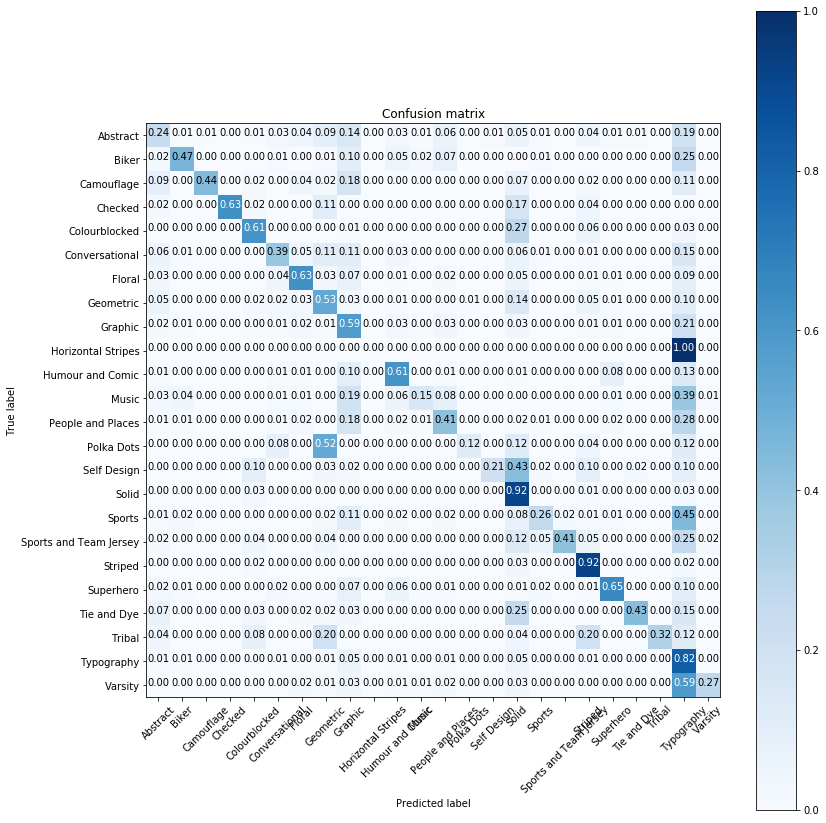

In [15]:
plot_confusion_matrix_mine(cm,data.classes,normalize=True)

In [16]:
arch_201=dn201

In [17]:
trn_tfms,val_tfms = tfms_from_model(arch,sz,crop_type=CropType.NO)

In [18]:
data = ImageClassifierData.from_csv(path='data/hackerearth-myntra/',folder='train',csv_fname='myntra-last.csv',tfms=(trn_tfms,val_tfms),bs=bs)

In [19]:
learn_201 = ConvLearner.pretrained(arch_201,data,precompute=True,ps=0.2)

In [20]:
learn_201.fit(0.005,5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                     
    0      1.06259    0.974806   0.712033  
    1      0.965766   0.936537   0.717728                      
    2      0.881428   0.90462    0.731308                      
    3      0.81336    0.895926   0.735178                      
    4      0.798642   0.885309   0.739924                      



[0.88530922, 0.73992406542056077]

In [21]:
learn_201.fit(0.005,2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                      
    0      0.789814   0.889689   0.737077  
    1      0.710203   0.896769   0.739778                      



[0.89676946, 0.7397780373831776]

In [22]:
learn_201.fit(0.005,2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                      
    0      0.715037   0.888726   0.742188  
    1      0.670779   0.906746   0.74248                       



[0.90674555, 0.74247955607476634]

In [23]:
learn_201.fit(0.0001,5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                      
    0      0.53774    0.890511   0.748905  
    1      0.52744    0.880633   0.751387                      
    2      0.487952   0.877476   0.752555                      
    3      0.500224   0.874269   0.753797                      
    4      0.505044   0.87509    0.75314                       



[0.87509018, 0.75313960280373837]

In [24]:
learn_201.fit(0.0005,2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                      
    0      0.518833   0.87212    0.754308  
    1      0.486325   0.87417    0.75606                       



[0.87416959, 0.75606016355140182]

In [25]:
learn_201.fit(0.0005,2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                      
    0      0.482085   0.872013   0.7546    
    1      0.497131   0.879368   0.75533                       



[0.87936836, 0.75533002336448596]

In [26]:
learn_201.fit(0.0001,2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                      
    0      0.454689   0.87229    0.755841  
    1      0.443553   0.867071   0.757301                      



[0.86707139, 0.75730140186915884]

In [27]:
log_preds_201,y_201 = learn_201.TTA()
probs_201 = np.mean(np.exp(log_preds_201),0)
accuracy_np(probs_201, y_201)
y_201[10]=9
predictions_201 = np.argmax(probs_201,axis=1)
cm_201 = confusion_matrix(y_201, predictions_201)


Confusion matrix, without normalization
[[ 138    1    1    1    2    9   20   31   76    0    9    1   25    0    0   34    7    0   17    8    3
     0   71    0]
 [   1   67    0    0    0    1    2    0   14    0    0    1    5    0    0    1    0    0    0    0    0
     0   31    1]
 [   5    0   25    0    1    0    2    0    3    0    0    0    0    0    0    3    0    0    1    0    0
     1    4    0]
 [   2    0    0   28    0    0    0    2    0    0    0    0    0    0    0    9    0    0    4    0    0
     0    1    0]
 [   2    0    0    0  304    1    0    6    4    0    2    0    0    3    1  140    0    0   30    1    1
     0   18    0]
 [  14    1    0    0    1  130    9   21   34    0   11    0    2    0    0    9    1    0    1    2    0
     0   36    0]
 [  10    0    0    0    0   12  200    4   25    0    1    0    6    0    0   12    0    0    3    0    0
     0   34    0]
 [  23    0    3    2    7   14    8  208   23    0    1    0    4    2    2   53    

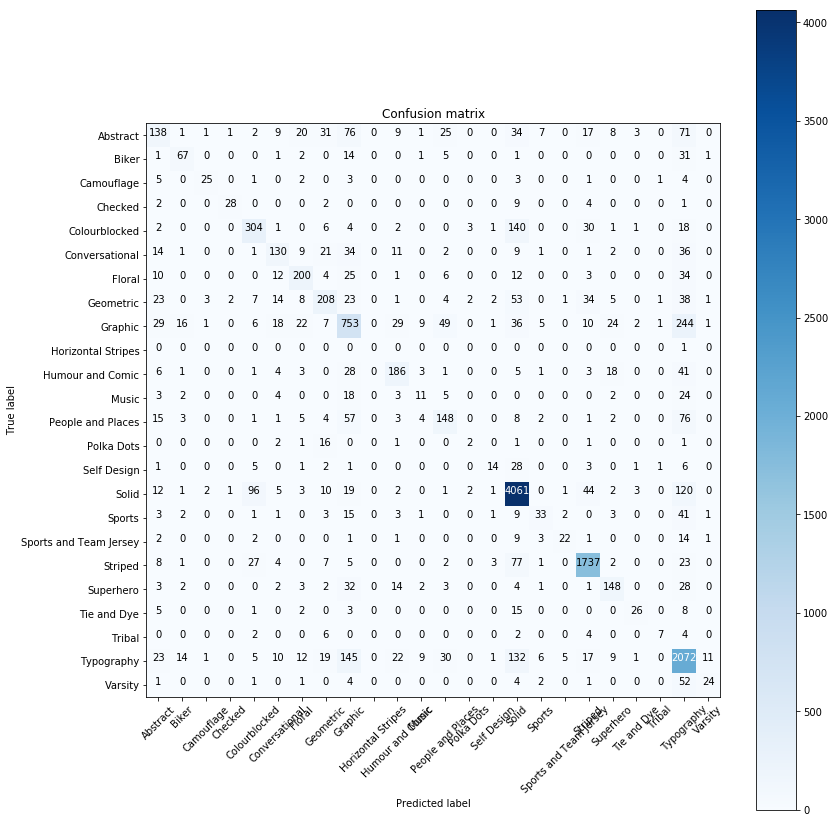

In [28]:
plot_confusion_matrix_mine(cm_201,data.classes,normalize=False)

In [29]:
probs_ensemble = probs_201 + probs

In [30]:
probs_ensemble[:2]

array([[ 0.00037,  0.00002,  0.00002,  0.00004,  0.00003,  0.00224,  0.00014,  0.00101,  0.00046,  0.00002,
         0.00021,  0.00001,  0.0001 ,  0.0003 ,  0.00016,  1.98333,  0.00031,  0.     ,  0.00014,  0.00034,
         0.00015,  0.00001,  0.0104 ,  0.0002 ],
       [ 0.00812,  0.00005,  0.00016,  0.00005,  0.0002 ,  0.01163,  0.00609,  0.0007 ,  0.00057,  0.00104,
         0.00059,  0.00009,  0.00326,  0.00162,  0.00388,  1.91801,  0.00008,  0.00001,  0.00209,  0.0001 ,
         0.00084,  0.00004,  0.04015,  0.00063]], dtype=float32)

In [31]:
probs_ensemble = probs_ensemble/2

In [32]:
probs_ensemble[:2]

array([[ 0.00018,  0.00001,  0.00001,  0.00002,  0.00001,  0.00112,  0.00007,  0.00051,  0.00023,  0.00001,
         0.0001 ,  0.00001,  0.00005,  0.00015,  0.00008,  0.99167,  0.00016,  0.     ,  0.00007,  0.00017,
         0.00007,  0.00001,  0.0052 ,  0.0001 ],
       [ 0.00406,  0.00002,  0.00008,  0.00002,  0.0001 ,  0.00582,  0.00304,  0.00035,  0.00028,  0.00052,
         0.00029,  0.00004,  0.00163,  0.00081,  0.00194,  0.959  ,  0.00004,  0.     ,  0.00105,  0.00005,
         0.00042,  0.00002,  0.02007,  0.00032]], dtype=float32)

In [33]:
accuracy_np(probs_ensemble, y)


0.76887620719929761

In [34]:
accuracy_np(probs,y)

0.75278021656423766

In [35]:
accuracy_np(probs_201,y_201)

0.75680421422300259

In [36]:
predictions_ensemble = np.argmax(probs_ensemble,axis=1)


In [37]:
cm_ensemble = confusion_matrix(y, predictions_ensemble)


Confusion matrix, without normalization
[[ 129    5    1    1    2    8   18   34   79    0    9    1   23    0    2   35    2    0   18    4    6
     0   77    0]
 [   3   64    0    0    0    1    0    0    9    0    3    1    7    0    0    1    0    0    0    1    0
     0   34    0]
 [   4    0   25    0    1    0    2    0    4    0    0    0    0    0    0    2    0    0    0    0    0
     1    6    0]
 [   1    0    0   30    0    0    0    1    0    0    0    0    0    0    0   10    0    0    4    0    0
     0    0    0]
 [   1    0    0    2  311    1    0    3    5    0    1    0    0    1    0  137    0    0   32    1    1
     0   17    0]
 [  15    1    0    0    1  126    9   24   26    0   10    0    2    0    0   12    1    0    1    3    0
     0   41    0]
 [   7    0    1    0    1   12  202    4   23    0    3    0    6    0    0   13    0    0    3    0    0
     0   32    0]
 [  23    0    3    1    4   13    9  225   11    0    0    0    3    1    1   60    

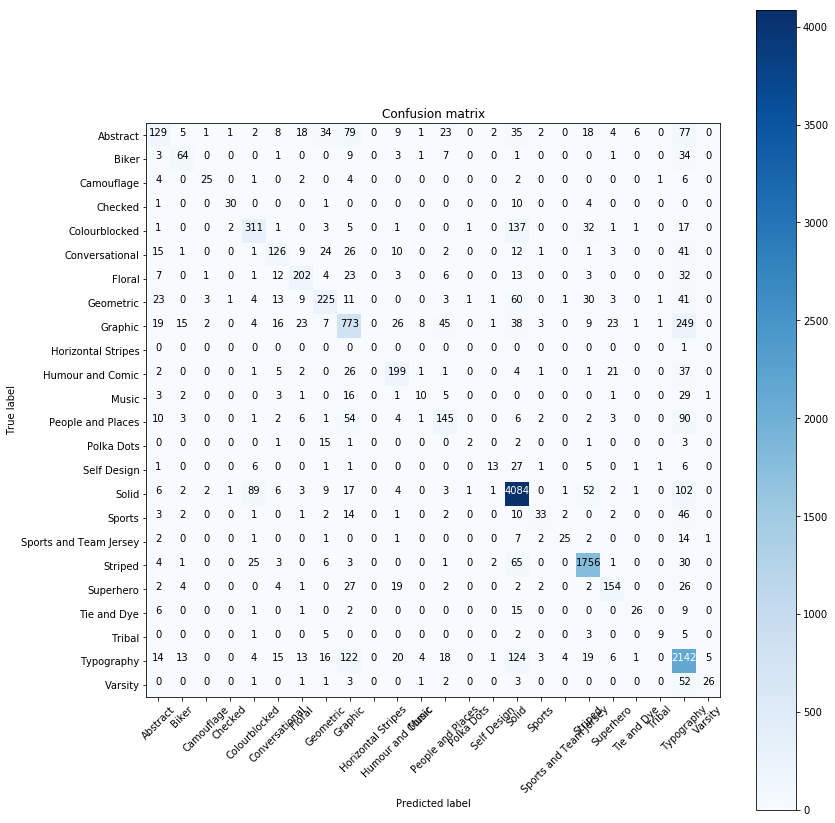

In [38]:
plot_confusion_matrix_mine(cm_ensemble,data.classes,normalize=False)

Normalized confusion matrix
[[ 0.28414  0.01101  0.0022   0.0022   0.00441  0.01762  0.03965  0.07489  0.17401  0.       0.01982  0.0022
   0.05066  0.       0.00441  0.07709  0.00441  0.       0.03965  0.00881  0.01322  0.       0.1696   0.     ]
 [ 0.02419  0.51613  0.       0.       0.       0.00806  0.       0.       0.07258  0.       0.02419  0.00806
   0.05645  0.       0.       0.00806  0.       0.       0.       0.00806  0.       0.       0.27419  0.     ]
 [ 0.08889  0.       0.55556  0.       0.02222  0.       0.04444  0.       0.08889  0.       0.       0.       0.
   0.       0.       0.04444  0.       0.       0.       0.       0.       0.02222  0.13333  0.     ]
 [ 0.02174  0.       0.       0.65217  0.       0.       0.       0.02174  0.       0.       0.       0.       0.
   0.       0.       0.21739  0.       0.       0.08696  0.       0.       0.       0.       0.     ]
 [ 0.00195  0.       0.       0.0039   0.60624  0.00195  0.       0.00585  0.00975  0.       0.0019

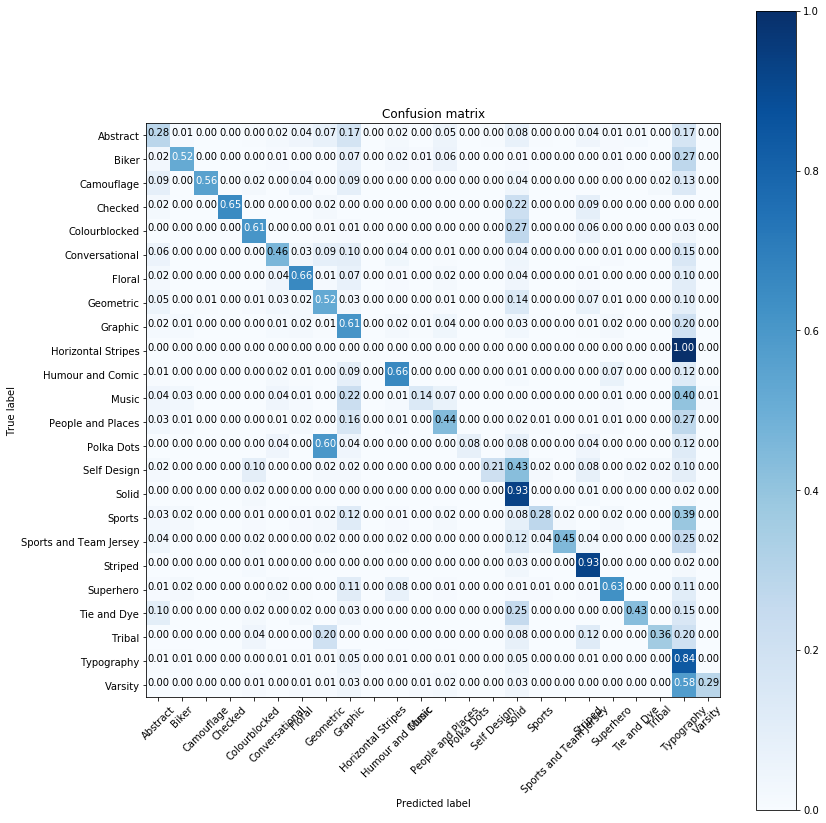

In [39]:
plot_confusion_matrix_mine(cm_ensemble,data.classes,normalize=True)

In [40]:
learn.unfreeze()

In [41]:
learn_201.unfreeze()

In [42]:
fname = '/home/paperspace/data/hackerearth-myntra/test/11476446167866-2GO-Women-Grey-Solid-V-Neck-T-Shirt-3201476446167715-1.jpg'


In [43]:
test = open_image(fname)
test= val_tfms((test))
test.shape

(3, 320, 320)

In [44]:
pred_temp = learn.predict_array(test[None])

pred_temp = np.exp(pred_temp)
pred_temp

array([[ 0.00026,  0.     ,  0.00001,  0.00001,  0.00827,  0.00005,  0.00001,  0.00064,  0.00104,  0.00002,
         0.00002,  0.00001,  0.00059,  0.00013,  0.00012,  0.98187,  0.00013,  0.     ,  0.00036,  0.00001,
         0.00013,  0.00001,  0.0063 ,  0.00003]], dtype=float32)

In [45]:
data.classes[np.argmax(pred_temp[0,:])]

'Solid'

In [46]:
pred_temp_201 = learn_201.predict_array(test[None])
pred_temp_201 = np.exp(pred_temp_201)
pred_temp_201

array([[ 0.00007,  0.     ,  0.00001,  0.00003,  0.00091,  0.     ,  0.00002,  0.00037,  0.00012,  0.00001,
         0.00001,  0.     ,  0.00002,  0.00002,  0.0001 ,  0.99653,  0.00007,  0.     ,  0.00003,  0.00002,
         0.0001 ,  0.     ,  0.00152,  0.00003]], dtype=float32)

In [47]:
data.classes[np.argmax(pred_temp_201[0,:])]

'Solid'

In [48]:
import pandas as pd

path = 'data/hackerearth-myntra'

In [49]:
df = pd.read_csv(f'myntra-submission_online-final.csv', low_memory=False)

In [ ]:
df.head()

,Brand,Category,Gender,Color,Link_to_the_image,Sub_category
0,Allen Solly,Tshirts,Men,Red,http://myntra.myntassets.com/assets/images/182...,NaN
1,Celio,Tshirts,Men,Yellow,http://myntra.myntassets.com/assets/images/109...,NaN
2,CULT FICTION,Tshirts,Men,Rust,http://myntra.myntassets.com/assets/images/159...,NaN
3,Antigravity,Tshirts,Women,Blue,http://myntra.myntassets.com/assets/images/185...,NaN
4,Being Human,Tshirts,Men,Charcoal,http://myntra.myntassets.com/assets/images/100...,NaN


In [ ]:
for i,row in df.iterrows():
    pic_link = row['Link_to_the_image'] 
    try:
        pic_name_temp = pic_link.split('/')
        pic_name = pic_name_temp[len(pic_name_temp)-1]
        full_path_name = '/home/paperspace/fastai/courses/dl1/'+path+'/test/'+pic_name
        img = val_tfms(open_image(full_path_name))
        
        pred_one = learn.predict_array(img[None])
        pred_two = learn_201.predict_array(img[None])
        pred_ensemble = (pred_one + pred_two)/2
        pred_ensemble = np.exp(pred_ensemble)
        temp_data = data.classes[np.argmax(pred_ensemble)]
        df.loc[i,'Sub_category']=temp_data
        print(str(i)+temp_data)
    except:
        print(pic_link)
        df.loc[i,'Sub_category']='Solid'
print(count)

0Solid
1Solid
2Solid
3Conversational
4Graphic
5Checked
6Typography
7Typography
8Solid
9Solid
10Solid
11Conversational
12Typography
13Striped
14Striped
15Typography
16Colourblocked
17Typography
18Striped
19Tie and Dye
20Solid
21Typography
22Solid
23Solid
24Conversational
25Solid
26Striped
27Solid
nan
29Solid
30Floral
31Geometric
32Striped
33Striped
34Typography
35Typography
36Floral
37Solid
38Graphic
39Colourblocked
40Solid
41Geometric
42Striped
43Camouflage
44Striped
45Solid
46Solid
47Typography
48Typography
49Floral
50Typography
51Typography
52Striped
53Solid
54Solid
55Solid
56Typography
57Typography
58Solid
59Floral
60Typography
61Graphic
62Typography
63Solid
64Typography
65Typography
66Solid
67Floral
68Typography
69Solid
70Solid
71Typography
http://repo.karvyecom.com/image-repository/Classic/PERLE-SLT/PERLE-SLT_1.jpg
73Humour and Comic
74Striped
75Solid
76Typography
77Solid
78Solid
79Abstract
80Typography
81Solid
82Solid
83Typography
84Striped
85Solid
86Typography
87Typography
88Str

703Solid
704Solid
705Typography
706Solid
707Striped
708Solid
709Solid
710Striped
711Typography
712Graphic
713Typography
714Typography
715Typography
716Solid
717Typography
718Striped
719Solid
720Typography
721Solid
722Solid
723Solid
724Sports
725Solid
726Typography
727Biker
728Striped
729Solid
730Solid
731Solid
732Geometric
733Striped
nan
735Solid
736Solid
737Solid
738Colourblocked
739Graphic
740Striped
741Striped
742Typography
743Solid
744Solid
745Typography
746Typography
747Solid
748Typography
749Solid
750People and Places
751Solid
752Solid
753Solid
754Superhero
755Typography
756Solid
757Tribal
758Solid
759Solid
760Floral
761Striped
762Typography
763Striped
764Solid
765Typography
766Floral
767Typography
768Typography
769Striped
770Typography
771Solid
772Solid
773Solid
774Striped
775Striped
776Typography
777Solid
778Typography
779Solid
780Typography
781Striped
782Striped
783Typography
784Typography
785Colourblocked
786Typography
787Solid
788Typography
789Solid
790Superhero
791Solid
792

1380Geometric
1381Solid
1382Solid
1383Solid
1384Solid
1385Solid
1386Solid
nan
1388Solid
1389Solid
1390Typography
1391Conversational
1392Solid
1393Typography
1394Graphic
1395Typography
1396Striped
1397Typography
1398Graphic
1399Solid
1400Typography
1401Typography
1402Solid
1403Typography
1404Typography
1405Typography
1406Graphic
1407Typography
1408Typography
1409Geometric
1410Solid
1411Solid
1412Solid
1413Geometric
1414Typography
1415Conversational
1416Solid
1417Solid
1418Solid
1419Biker
1420Solid
1421Typography
1422Graphic
1423Typography
1424Colourblocked
1425Solid
1426Striped
1427Typography
1428Floral
1429Typography
1430Solid
1431Solid
1432Solid
1433Solid
1434Solid
1435Striped
1436Solid
1437Graphic
1438Typography
1439Striped
1440Striped
1441Typography
1442Solid
1443Solid
1444Solid
1445Typography
1446Striped
1447Typography
1448Typography
1449Solid
1450Striped
1451Typography
1452Solid
1453Solid
1454People and Places
1455Solid
nan
1457Conversational
1458Typography
1459Conversational
1460

2014Solid
2015Solid
2016Solid
2017Solid
2018Graphic
2019People and Places
2020Typography
2021Typography
2022Solid
2023Solid
2024Striped
2025Typography
2026Graphic
2027Striped
2028Striped
2029Striped
2030Colourblocked
2031Solid
2032Striped
2033Typography
2034Typography
2035Solid
2036Striped
2037Checked
2038Solid
2039Typography
2040Floral
2041Floral
2042Solid
2043Solid
2044Typography
2045Typography
2046Abstract
2047Solid
2048Solid
2049Solid
2050Solid
2051Solid
2052Floral
2053Striped
2054Typography
nan
2056Striped
2057Striped
2058Abstract
2059Typography
2060Striped
2061Typography
2062Graphic
2063Striped
2064Graphic
2065Solid
2066Graphic
2067Solid
2068Solid
2069People and Places
2070Solid
2071Solid
2072Geometric
2073Solid
2074Humour and Comic
2075Solid
2076Floral
2077Solid
2078Solid
2079Typography
2080Typography
2081Solid
2082Typography
2083Solid
2084Superhero
2085Solid
2086Solid
2087Solid
2088Solid
2089Striped
2090Graphic
2091Solid
2092Typography
2093Striped
2094Solid
2095Solid
2096Typogr

2657Solid
2658Solid
2659Graphic
2660Geometric
2661Striped
2662Typography
2663Solid
2664Typography
2665Solid
2666Solid
2667Typography
2668Colourblocked
2669Solid
2670Solid
2671Camouflage
2672Solid
2673Floral
2674Typography
2675Striped
2676Colourblocked
2677Solid
2678Typography
2679Typography
2680Solid
2681Typography
2682Typography
2683Typography
2684Striped
2685Floral
2686Solid
2687Striped
2688Floral
2689Striped
2690Striped
2691Typography
2692Solid
2693Striped
2694Typography
2695Typography
2696Solid
2697Striped
2698Solid
2699Conversational
2700Typography
2701Typography
2702Solid
2703Solid
2704Solid
2705Solid
2706Humour and Comic
2707Typography
2708Typography
2709Solid
2710Graphic
2711Solid
2712Solid
2713Solid
2714Typography
2715Solid
2716Graphic
2717Solid
2718Typography
2719Striped
2720Graphic
2721Typography
2722Typography
2723Typography
2724Conversational
2725Colourblocked
2726Typography
2727Striped
nan
2729Solid
2730Solid
2731People and Places
https://www.dropbox.com/s/ej4fvmfcbv8v1wu

3313Typography
3314Typography
3315Striped
3316Solid
3317Solid
3318Striped
3319Geometric
3320Striped
3321Floral
3322Solid
3323Colourblocked
3324Geometric
3325Typography
3326Geometric
3327Typography
3328Solid
3329Solid
3330People and Places
3331Solid
3332People and Places
3333Striped
3334Typography
3335Solid
3336Typography
3337Typography
3338Typography
3339Typography
nan
3341Typography
3342Floral
3343Solid
3344Solid
3345Typography
3346Typography
3347Typography
3348Typography
3349Striped
3350Humour and Comic
3351Typography
3352Graphic
3353Striped
3354Solid
3355Striped
3356Graphic
3357Typography
3358Abstract
3359Solid
3360Solid
3361Striped
3362Graphic
3363Graphic
3364Solid
3365Solid
3366Striped
3367Graphic
3368Floral
3369Solid
3370Typography
http://cdn.myeshopbox.com/flipkart_images/duke-45-styles-lot24/LF2779_White/FLIPKART_2.jpg
3372Typography
3373Typography
3374Geometric
3375Solid
3376Typography
3377Solid
3378Typography
3379Graphic
3380Striped
3381Solid
3382Solid
3383Solid
3384Geometric

3944Striped
3945Solid
3946Solid
3947Typography
3948Colourblocked
3949Typography
3950Solid
3951Typography
3952Typography
3953Colourblocked
3954Solid
3955Tie and Dye
3956Floral
3957Solid
3958Solid
3959Solid
3960Typography
3961Solid
3962Solid
3963Colourblocked
3964Humour and Comic
3965Solid
3966Solid
3967Typography
3968Solid
3969Solid
3970Conversational
3971Typography
3972Striped
3973Solid
3974Solid
3975Abstract
3976Typography
3977Solid
3978Striped
3979Solid
3980Floral
3981Solid
3982Typography
3983Solid
3984Typography
3985Solid
3986Striped
3987Graphic
3988Solid
3989Typography
3990Solid
3991Solid
3992Floral
3993Typography
3994Solid
3995Typography
nan
3997Solid
3998Solid
3999People and Places
4000Solid
4001Typography
4002Superhero
4003Solid
4004Solid
4005Solid
4006Solid
4007Graphic
4008Solid
4009Typography
4010Typography
4011People and Places
4012Striped
4013Geometric
nan
4015Typography
4016Solid
4017Solid
4018Solid
4019Conversational
4020Typography
4021Striped
4022Graphic
4023Typography
40

4583Typography
4584Solid
4585Solid
4586Typography
4587Solid
4588Typography
4589Typography
4590Solid
4591Solid
4592Graphic
4593Solid
4594Striped
4595Solid
4596Geometric
4597Solid
4598Solid
4599Striped
4600Solid
4601Typography
4602Typography
4603Striped
4604Typography
4605Striped
4606People and Places
4607Typography
4608Solid
4609Striped
4610Solid
4611Striped
4612Typography
4613Solid
nan
4615Striped
4616Humour and Comic
4617Striped
4618Graphic
4619Solid
4620Graphic
4621Graphic
4622Solid
4623Typography
4624Typography
4625Geometric
4626Typography
4627Typography
4628Striped
4629Striped
4630Solid
4631Solid
4632Solid
4633Solid
4634Solid
4635Typography
4636Solid
4637Typography
4638Solid
4639Typography
4640Solid
4641Typography
4642Solid
4643Striped
4644Typography
4645Solid
4646Striped
4647Typography
4648Typography
4649Typography
4650Typography
4651Solid
4652Superhero
4653Solid
4654Solid
4655Solid
4656Solid
4657Typography
4658Typography
4659Abstract
4660Solid
4661Solid
4662Typography
4663Abstrac

5213Typography
5214Solid
5215Graphic
5216Typography
5217Typography
5218Solid
5219Typography
5220Humour and Comic
5221Typography
5222Solid
5223Solid
5224Solid
5225Geometric
5226Solid
5227Colourblocked
5228Typography
5229Solid
5230Solid
5231Typography
5232Striped
5233Typography
5234Humour and Comic
5235Solid
5236Solid
5237Solid
5238Superhero
5239Striped
5240Typography
5241Striped
5242Solid
5243Typography
5244Striped
5245Solid
5246Solid
5247Solid
5248Solid
5249Graphic
5250Floral
5251Graphic
5252Geometric
5253Geometric
5254Solid
5255Graphic
5256Solid
5257Floral
5258Typography
5259Typography
5260Typography
5261Typography
5262Solid
5263Solid
5264Striped
5265Striped
5266Typography
5267Solid
5268Colourblocked
5269Typography
5270Solid
5271Striped
5272Solid
5273Solid
5274Striped
5275Solid
5276Striped
5277Solid
5278Colourblocked
5279Typography
5280Striped
5281People and Places
5282Typography
5283Typography
5284Typography
5285Typography
5286Solid
5287People and Places
5288Striped
5289Floral
5290Ty

5865Graphic
5866Striped
5867Typography
5868Solid
5869Typography
5870Abstract
5871Striped
5872Striped
5873Typography
nan
5875Typography
5876Typography
5877Solid
5878Solid
5879Solid
5880Floral
5881Solid
5882Solid
5883Solid
5884Graphic
5885Solid
5886Solid
5887Typography
5888Colourblocked
5889People and Places
5890Striped
5891Typography
5892Solid
5893Typography
5894Solid
5895Typography
5896Typography
5897Typography
5898Solid
5899Solid
5900Solid
5901Solid
5902Solid
5903Solid
5904Solid
5905Geometric
5906Solid
5907Typography
5908Solid
5909Solid
5910Solid
5911Solid
5912Striped
5913Typography
5914Striped
5915Typography
5916Solid
5917Solid
5918Solid
5919People and Places
5920Typography
5921Solid
5922Typography
5923Geometric
5924Solid
5925Solid
5926Solid
5927Striped
5928Striped
5929Biker
5930Solid
5931Striped
5932Solid
5933Solid
5934Typography
5935Solid
5936Typography
5937Solid
5938Solid
5939Solid
5940Solid
5941Solid
5942Solid
5943Striped
5944Solid
5945Solid
5946Graphic
5947Typography
5948Solid
5

6512Solid
6513Striped
6514Solid
6515Colourblocked
6516Solid
6517Solid
6518Typography
6519Typography
6520Colourblocked
6521Solid
http://repo.karvyecom.com/image-repository/Classic/PERLE-DSL/PERLE-DSL_1.jpg
6523Typography
6524Solid
6525Typography
6526Typography
6527Striped
6528Typography
6529Typography
6530Striped
6531Typography
6532Graphic
6533Solid
6534Graphic
6535Solid
6536Solid
6537Typography
6538Striped
6539People and Places
6540Solid
6541Striped
6542Solid
6543Striped
6544Solid
6545Abstract
6546Striped
6547Typography
6548Solid
6549Geometric
6550Solid
6551Typography
6552Typography
6553People and Places
6554Striped
nan
6556Typography
6557Solid
nan
6559Solid
6560Typography
6561Solid
6562Striped
6563Typography
6564Solid
6565Solid
6566Solid
6567People and Places
6568Typography
6569Striped
6570Typography
6571Striped
6572Typography
6573Striped
nan
6575Solid
6576Solid
6577Solid
6578Solid
6579Graphic
6580Solid
6581Geometric
6582Typography
6583Typography
6584Sports
6585Typography
6586Solid
65

7165Typography
7166Typography
7167Solid
7168Solid
7169Striped
7170Typography
7171Solid
7172Abstract
7173Solid
7174Colourblocked
7175Solid
7176Striped
7177People and Places
7178Striped
7179Solid
7180Striped
7181Geometric
7182Typography
7183Striped
7184Solid
7185Typography
7186Typography
7187Solid
7188Solid
7189Floral
7190Typography
7191Floral
7192Typography
7193Typography
7194Geometric
7195Solid
7196Solid
7197Solid
7198Solid
7199Conversational
7200Striped
7201Solid
7202Solid
7203Solid
7204Typography
7205Solid
7206Striped
7207Geometric
7208Solid
7209Striped
7210Graphic
nan
7212Solid
7213Solid
7214Typography
7215Conversational
7216Striped
7217Graphic
7218Solid
7219Solid
7220Humour and Comic
7221Typography
7222Typography
7223Solid
7224Solid
7225Striped
7226Graphic
7227Superhero
7228Solid
7229Solid
7230Conversational
7231Geometric
7232Graphic
7233Colourblocked
7234Typography
7235Solid
7236Solid
7237Typography
7238Colourblocked
7239Solid
7240Solid
7241Striped
7242Solid
7243Typography
7244Sol

7809Solid
7810Solid
7811Conversational
7812Solid
7813Typography
7814Solid
7815Humour and Comic
7816Solid
7817Typography
7818Solid
7819Solid
7820Striped
7821Abstract
7822Solid
7823Typography
7824Geometric
7825Typography
7826Solid
7827Solid
7828Abstract
7829Typography
7830Typography
7831Typography
7832Typography
nan
7834Typography
7835Humour and Comic
7836Solid
7837Solid
7838Typography
7839Solid
7840Solid
7841Striped
7842Solid
7843Solid
7844Solid
7845Solid
7846Solid
7847Typography
7848Typography
7849Typography
7850Solid
7851Solid
7852Graphic
7853Typography
7854Typography
7855Typography
7856Striped
7857Solid
7858Typography
7859Floral
7860Solid
7861Typography
7862Striped
7863Solid
7864Typography
7865Striped
7866Solid
7867Solid
7868Graphic
7869Typography
7870Solid
7871Striped
nan
7873Striped
7874Graphic
7875Typography
7876Graphic
7877Striped
7878Solid
7879Solid
7880Typography
7881Typography
7882Striped
7883Floral
7884Typography
7885Solid
7886Solid
7887Solid
7888Abstract
7889Solid
7890Graphi

8459Typography
8460Solid
8461Striped
8462Striped
8463Floral
8464Striped
8465Abstract
8466Solid
8467Striped
8468Striped
8469Solid
8470Abstract
8471Solid
8472Conversational
8473Typography
8474Solid
8475Solid
8476Solid
8477Solid
8478Solid
8479Typography
8480Typography
8481Striped
8482Solid
8483Typography
8484Graphic
8485Striped
8486Solid
8487Abstract
8488Solid
8489Typography
8490Solid
8491Typography
8492Solid
8493Typography
8494Striped
8495Solid
8496Solid
8497Solid
8498Typography
8499Solid
8500Solid
8501Solid
8502Solid
8503Humour and Comic
8504Graphic
8505Tie and Dye
8506Typography
8507Solid
8508Solid
8509Typography
8510Abstract
8511Solid
8512Typography
8513Solid
8514Striped
8515Solid
8516Colourblocked
nan
8518Striped
8519Solid
8520Solid
8521Typography
8522Solid
8523Typography
8524Geometric
8525Solid
8526Solid
8527Colourblocked
8528Striped
8529Solid
8530Typography
8531Solid
8532Solid
8533Geometric
8534Solid
8535Typography
8536Colourblocked
8537Typography
8538Solid
8539Solid
http://cdn.mye

9100Solid
nan
9102Solid
9103Typography
9104Solid
9105Striped
9106Solid
9107Striped
9108Solid
9109Geometric
9110Solid
9111Colourblocked
9112Colourblocked
9113Superhero
9114Solid
9115Typography
9116Solid
9117Typography
9118Solid
9119Typography
9120Solid
9121Solid
9122Solid
9123Typography
9124Solid
9125Typography
9126Striped
9127Solid
9128Tie and Dye
9129Typography
9130Solid
9131Typography
9132Solid
9133Typography
9134Colourblocked
9135Solid
9136Striped
9137People and Places
9138Typography
9139Solid
9140Solid
9141Typography
9142Solid
9143Solid
nan
9145Solid
9146Solid
9147Typography
9148Solid
9149Graphic
9150Striped
9151Solid
9152Graphic
9153Solid
9154Typography
9155Typography
9156Solid
9157Solid
9158Solid
9159Colourblocked
9160Solid
9161Solid
9162Solid
9163Solid
9164Striped
9165Solid
9166Typography
9167Striped
9168Solid
9169Solid
9170Solid
9171Typography
9172Solid
9173Typography
9174Striped
9175Typography
9176Solid
9177Striped
9178Solid
9179Typography
9180Solid
9181Abstract
9182Striped
91

9743Solid
9744Typography
9745Tribal
9746People and Places
9747Solid
9748Striped
9749Striped
9750Colourblocked
9751Solid
9752Striped
nan
9754Typography
9755Typography
9756Typography
9757Solid
9758Solid
9759Solid
9760Typography
9761Solid
9762Sports
9763Typography
9764Tie and Dye
9765Solid
9766Solid
9767Striped
9768Typography
9769Solid
9770Typography
9771Typography
9772Striped
9773Solid
9774Solid
9775Solid
9776Solid
9777Typography
9778Striped
9779Graphic
9780Striped
9781Graphic
9782Typography
9783Striped
9784Typography
9785Solid
9786Solid
9787Humour and Comic
9788Graphic
9789Graphic
9790Typography
9791Typography
9792Typography
9793Solid
9794Graphic
9795Graphic
9796Solid
9797Solid
9798Solid
9799Striped
9800Graphic
9801Striped
9802Solid
9803Solid
9804Abstract
9805Typography
9806Solid
9807Solid
nan
9809Solid
9810Solid
9811Solid
9812Graphic
9813Typography
9814Typography
9815Striped
9816Striped
9817Typography
9818Solid
9819Solid
9820Biker
9821Striped
9822Graphic
9823People and Places
9824Strip

10363Solid
10364Striped
10365Striped
10366Solid
10367Typography
10368Graphic
10369Solid
10370Solid
10371Solid
10372Typography
10373Solid
10374Typography
10375Solid
10376Solid
10377Solid
10378Graphic
nan
10380Solid
10381Solid
10382Graphic
10383Striped
10384Graphic
10385Solid
10386Solid
10387Striped
10388Typography
10389Sports
10390Typography
10391Typography
10392Abstract
10393Typography
10394Geometric
10395Typography
10396Typography
10397Solid
10398Solid
10399Typography
10400Typography
10401Solid
10402Striped
10403Typography
10404Solid
10405Conversational
10406Striped
10407Typography
10408Typography
10409Typography
10410Striped
10411Solid
10412Striped
10413Solid
10414Striped
10415Solid
10416Striped
10417Typography
nan
10419Typography
10420Striped
10421Typography
10422Solid
10423Typography
10424Typography
10425Typography
10426Typography
10427Typography
10428Solid
10429Solid
10430Conversational
10431Solid
10432Typography
10433Solid
10434Floral
10435Solid
10436Solid
10437Abstract
10438Stri

10954Typography
http://repo.karvyecom.com/image-repository/Classic/PERLE-RBR/PERLE-RBR_1.jpg
10956Solid
10957Striped
10958Camouflage
10959Solid
10960Solid
10961Solid
10962Striped
10963Solid
10964Solid
10965Solid
10966Solid
10967Solid
10968Geometric
10969Striped
10970Solid
10971Solid
10972Striped
10973Solid
10974Solid
10975Solid
10976Graphic
10977Typography
10978Typography
10979Solid
10980Typography
10981Typography
10982Abstract
10983Varsity
10984Solid
10985Solid
10986Graphic
10987Solid
10988Typography
10989Solid
10990Striped
10991Graphic
10992Typography
10993Solid
10994Abstract
10995Solid
10996Solid
10997Striped
10998Colourblocked
10999Striped
11000Typography
11001Solid
11002Colourblocked
11003Superhero
11004Solid
11005People and Places
11006Striped
11007Solid
nan
11009Solid
11010Typography
11011Geometric
11012Typography
11013Colourblocked
11014Striped
11015Solid
11016Typography
11017Striped
11018Colourblocked
11019Striped
11020Striped
11021Checked
11022Geometric
11023Typography
11024T

11539Typography
11540Solid
11541Typography
11542Solid
11543Striped
11544Colourblocked
11545Solid
11546Striped
11547Typography
11548Abstract
11549Solid
11550Humour and Comic
11551Striped
11552People and Places
11553Typography
11554Typography
11555Typography
11556Typography
11557Typography
nan
11559Solid
11560Solid
11561Typography
nan
11563Typography
11564Typography
11565Typography
11566Typography
11567Solid
11568Striped
11569Graphic
11570Solid
11571Striped
11572Striped
11573Conversational
11574Striped
11575Solid
11576Solid
11577Graphic
11578Solid
11579Solid
nan
11581Typography
11582Typography
11583Solid
11584Solid
11585Striped
11586Typography
11587Solid
11588Striped
11589Typography
11590Solid
11591Typography
11592Striped
11593Typography
11594Graphic
11595Typography
11596People and Places
11597Solid
11598Solid
11599Solid
11600Typography
11601Humour and Comic
11602Striped
11603Typography
11604Striped
11605Solid
11606Typography
11607Typography
11608Solid
11609Typography
11610Striped
11611S

12149Solid
12150Typography
12151Striped
12152Typography
12153Typography
12154Geometric
12155People and Places
12156Solid
12157Typography
12158Solid
12159Graphic
12160Solid
12161Solid
12162Geometric
12163Solid
12164Typography
12165Typography
12166Typography
12167Solid
12168Striped
12169Colourblocked
12170Solid
12171Solid
12172Typography
12173Graphic
12174Striped
12175Typography
12176Solid
12177Solid
12178Solid
12179Striped
12180Solid
12181Conversational
12182Abstract
12183Typography
12184Solid
12185Striped
12186Typography
12187Solid
12188Typography
12189Solid
12190Solid
12191Solid
12192Striped
12193Typography
12194Solid
12195Typography
12196Typography
12197Solid
12198Solid
12199Solid
12200Striped
12201Striped
12202Typography
12203Typography
12204Floral
12205Solid
12206Typography
12207Typography
12208Striped
12209Typography
12210Graphic
12211Graphic
12212Geometric
12213Graphic
12214Superhero
12215Tribal
12216Geometric
12217Typography
12218Typography
12219Solid
12220Typography
12221Stripe

12761Striped
12762Typography
12763Typography
12764Striped
12765Solid
12766Typography
http://repo.karvyecom.com/image-repository/Classic/PERLE-SLT/PERLE-SLT_1.jpg
12768Music
12769Striped
12770Abstract
12771Typography
12772Typography
12773Solid
12774Typography
12775Striped
12776Typography
12777Typography
12778Typography
12779Solid
12780Typography
12781Typography
12782Typography
12783Striped
12784Graphic
12785Striped
12786Colourblocked
12787Typography
12788Solid
12789Solid
12790Typography
12791Solid
12792Superhero
12793Solid
12794Typography
12795Solid
12796Typography
12797Typography
12798Solid
12799Typography
12800Solid
12801Solid
12802Solid
12803Striped
12804Solid
12805Solid
12806Graphic
12807Typography
12808Striped
12809Geometric
12810Typography
12811Camouflage
12812People and Places
12813Solid
12814Striped
12815Conversational
12816Typography
12817Solid
12818Typography
12819Solid
12820Typography
12821Solid
12822Solid
12823Humour and Comic
12824Typography
12825Solid
12826Striped
12827Str

13364Solid
13365Solid
13366People and Places
13367Solid
13368Solid
13369Colourblocked
13370Solid
13371Graphic
13372Striped
13373Solid
13374Conversational
13375Solid
13376Solid
13377Typography
13378Solid
13379Typography
13380Solid
13381Geometric
13382Graphic
13383Solid
nan
13385Solid
13386Typography
13387Solid
13388Geometric
13389Typography
13390Superhero
13391Varsity
13392Striped
13393Striped
13394Typography
13395Solid
13396Typography
13397Solid
13398Typography
13399Typography
13400Graphic
13401Typography
13402Typography
13403Striped
13404Solid
13405Typography
13406Floral
13407Typography
13408Solid
13409Solid
13410Typography
13411Solid
13412Solid
13413Self Design
13414Solid
nan
13416Striped
13417Typography
13418Tie and Dye
13419Solid
13420Solid
13421Solid
13422Solid
13423Typography
13424Typography
13425Solid
13426Solid
13427Typography
13428Typography
13429Solid
13430Solid
13431Typography
13432People and Places
13433Typography
13434Graphic
13435Typography
13436Typography
13437Solid
1343

13971Colourblocked
13972Typography
13973Solid
13974Graphic
13975Humour and Comic
13976Solid
13977Striped
13978Solid
13979Solid
13980Typography
13981Striped
13982Graphic
13983Conversational
13984Solid
13985Solid
13986Colourblocked
13987Typography
13988Typography
13989Typography
13990Typography
13991Humour and Comic
13992Graphic
13993Colourblocked
13994Graphic
13995Superhero
13996Solid
13997Typography
13998Typography
13999Colourblocked
14000Striped
14001Striped
14002Humour and Comic
14003Graphic
14004Geometric
14005Typography
14006Graphic
14007Solid
14008Striped
14009Typography
14010Typography
14011Solid
14012Striped
14013Striped
14014Solid
14015Solid
14016Colourblocked
14017Striped
14018Striped
14019Striped
14020Solid
14021Solid
14022Floral
14023Solid
14024Solid
14025Solid
14026Abstract
14027Striped
14028Solid
14029Typography
14030Conversational
14031Striped
14032Typography
14033Solid
14034Typography
14035Typography
14036Solid
14037Solid
14038Solid
14039Striped
14040Solid
14041Solid
140

14576Graphic
14577Graphic
14578Striped
14579Solid
14580Typography
14581Solid
14582Typography
nan
14584Solid
14585Solid
14586Typography
14587Striped
14588Striped
14589Striped
14590Solid
14591Solid
14592Typography
14593Solid
14594Solid
14595Solid
14596Striped
14597Solid
14598Solid
14599Striped
14600Graphic
14601Typography
14602Geometric
14603Typography
14604Striped
14605Solid
14606Typography
14607Solid
14608Solid
14609Typography
14610Striped
14611Typography
14612Solid
14613Solid
14614Solid
14615Striped
14616Typography
14617Solid
14618Colourblocked
14619Graphic
14620Solid
14621Typography
14622Solid
14623Solid
nan
14625Typography
14626Solid
14627Solid
14628Solid
14629Solid
14630Colourblocked
14631Striped
14632Solid
14633Colourblocked
14634Striped
14635Typography
14636Solid
14637Solid
14638Typography
14639Typography
14640Typography
14641Solid
14642Geometric
14643Solid
14644Striped
14645Solid
14646Typography
14647Solid
14648Solid
14649Typography
14650Typography
14651Solid
14652Solid
14653Sol

In [ ]:
df.tail()

In [ ]:
df.to_csv('myntra-ensemble-dn201-and-dn121',index=False)